# Insitu precipitation extremes assessment for drought monitoring 

Production date: 10/10
/2024

Produced by: Ana Oliveira (CoLAB +ATLANTIC)

## 🌍 Use case: Using gridded precipitation data to monitor droughts over the Iberian Peninsula

## ❓ Quality assessment question
* **How well can we disclose which regions are the most exposed to droughts? What are the observed changes?** 

In this Use Case we will access the E-OBS daily gridded meteorological data for Europe from 1950 to present derived from in-situ observations (henceforth, E-OBS) data from the Climate Data Store (CDS) of the Copernicus Climate Change Service (C3S) and and analyse the spatial consistency of the datasets in monitoring drougths over the Iberian Peninsula.

## 📢 Quality assessment statement

* According to Bandhauer et al. (2021) both E-OBS and ERA5 demonstrate accuracy in capturing precipitation patterns, with E-OBS showing good agreement in regions with dense station networks while ERA5 exhibits consistent mesoscale pattern representation. The authors also concluded that E-OBS can capture extreme values of precipitation in areas with high data density but may smooth out extreme events in data-sparse regions, however ERA5 shows improved detection of extreme precipitation events due to advanced physical modeling.

* In Mavromatis & Voulanas (2020) evaluated the effectiveness of the E-OBS dataset for drought monitoring in Greek wine production areas from 1981 to 2012. E-OBS excelled in reproducing annual decreasing precipitation trends across spring, summer, and autumn, and accurately captured monthly variability, especially in the spring and summer. It demonstrated lower error rates compared to other datasets and performed well in various statistical evaluations, including better simulation of wet and dry day probabilities and extreme precipitation indices. For drought monitoring specifically, E-OBS proved superior when using the Standardized Precipitation Index (SPI).

* In Philip et al. (2020) by using E-OBS the authors were able to infer the regional differences in drought conditions and climate variables, particularly in assessing historical trends and spatial patterns across the Netherlands. This show the capacity of the dataset of disclosing which regions are more exposed to drougths and the observed changes.

* In Vicente-Serranto et al. (2022), Kourtis et al. (2023) and Najmi et al. (2023) the authors found that the ERA5 dataset yields reliable results for drought monitoring purposes.

## 📋 Methodology

**[](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ4_v1.1:code-section-1)**  
**[](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ4_v1.1:code-section-1.1)**  
**[](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ4_v1.1:code-section-1.2)**  
**[](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ4_v1.1:code-section-2)**  
**[](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ4_v1.1:code-section-3)**  
**[](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ4_v1.1:code-section-4)**  
**[](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ4_v1.1:code-section-5)**  
**[](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ4_v1.1:code-section-6)**

## 📈 Analysis and results

(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ4_v1.1:code-section-1)=
### 1. Define the AoI, search and download E-OBS


#### Import all the libraries/packages

We will be working with data in NetCDF format. To best handle this data we will use libraries for working with multidimensional arrays, in particular Xarray. We will also need libraries for plotting and viewing data, in this case we will use Matplotlib and Cartopy.

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import pymannkendall as mk
from c3s_eqc_automatic_quality_control import download, utils, diagnostics, plot

# # import libraries
# from cdo import cdo

# # check cdo
# cdo = Cdo()
# help(cdo.sinfov)

plt.rcParams["figure.figsize"] = [15, 5]
plt.style.use("seaborn-v0_8-notebook")

import warnings
import os
warnings.filterwarnings("ignore")

#### Data Overview

To search for data, visit the CDS website: http://cds.climate.copernicus.eu. Here you can search for 'in-situ observations' using the search bar. The data we need for this tutorial is the E-OBS daily gridded meteorological data for Europe from 1950 to present derived from in-situ observations. This catalogue entry provides a daily gridded dataset of historical meteorological observations, covering Europe (land-only), from 1950 to the present. This data is derived from in-situ meteorological stations, made available through the European Climate Assessment & Dataset (ECA&D) project, as provided by National Meteorological and Hydrological Services (NMHSs) and other data-holding institutes. 

E-OBS comprises a set of spatially continuous Essential Climate Variables (ECVs) from the Surface Atmosphere, following the Global Climate Observing System (GCOS) convention, provided as the mean and spread of the spatial prediction ensemble algorithm, at regular latitude-longitude grid intervals (at a 0.1° and 0.25° spatial resolution), and covering a long time-period, from 1 January 1950 to present-day. In addition to the land surface elevation, E-OBS includes daily air temperature (mean, maximum and minimum), precipitation amount, wind speed, sea-level pressure and shortwave downwelling radiation. 

The latest E-OBS version, E-OBSv29.0e, was released in March 2024 and its main difference from the previous E-OBSv28.0e is the amount of input data used.

Having selected the correct dataset, we now need to specify what product type, variables, temporal and geographic coverage we are interested in. In this Use Case, the ensemble mean of total percipitation will be used, considering the last version available. These can all be selected in the “Download data” tab from the CDS. In this tab a form appears in which we will select the following parameters to download, for example:

Product Type: Ensemble mean  
Variable: percipition sum 
Grid resolution: 0.25  
Period: Full period  
Version: 29.0e  
Format: Zip file (.zip)

At the end of the download form, select `Show API request`. This will reveal a block of code, which you can simply copy and paste into a cell of your Jupyter Notebook …

Download data
… having copied the API request to a Jupyter Notebook cell, running it will retrieve and download the data you requested into your local directory. However, before you run it, the `terms and conditions` of this particular dataset need to have been accepted directly at the CDS website. The option to view and accept these conditions is given at the end of the download form, just above the `Show API request` option. In addition, it is also useful to define the time period and AoI parameters and edit the request accordingly, as exemplified in the cells below.

(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ4_v1.1:code-section-1.1)=
### 1.1. Download and prepared E-OBS data

#### Download Percipitation Data

In [6]:
# Define request
request = (
    "insitu-gridded-observations-europe",
    {
        "format": "zip",
        "product_type": "ensemble_mean",
        "variable": "precipitation_amount",
        "grid_resolution": "0.25deg",
        "period": "full_period",
        "version": "29.0e",
        "area": [42.15, -9.50, 36.95, -6.19],#ajust for europe
    },
)

# Process the request
p_EOBS = download.download_and_transform(*request)

2024-05-29 10:18:25,975 INFO Welcome to the CDS
2024-05-29 10:18:25,979 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/insitu-gridded-observations-europe
2024-05-29 10:18:26,147 INFO Request is queued
2024-05-29 10:18:27,216 INFO Request is running
2024-05-29 10:20:20,168 INFO Request is completed
2024-05-29 10:20:20,171 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data0/dataset-insitu-gridded-observations-europe-6b99598a-05a8-48b3-874b-65fc59619683.zip to dataset-insitu-gridded-observations-europe-6b99598a-05a8-48b3-874b-65fc59619683.zip (5.3M)
2024-05-29 10:20:21,952 INFO Download rate 3M/s     


In [7]:
# Subset data for the year range 1950 to 2020
p_EOBS = p_EOBS.sel(time=slice('1950-01-01', '2020-12-31'))

# Inspect data
p_EOBS

<xarray.Dataset>
Dimensions:    (latitude: 21, longitude: 13, time: 25933)
Coordinates:
  * latitude   (latitude) float64 37.12 37.38 37.62 37.88 ... 41.62 41.88 42.12
  * longitude  (longitude) float64 -9.375 -9.125 -8.875 ... -6.875 -6.625 -6.375
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
Data variables:
    rr         (time, latitude, longitude) float32 dask.array<chunksize=(25933, 21, 13), meta=np.ndarray>
Attributes:
    E-OBS_version:  29.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Thu Feb 22 12:07:03 2024: ncks --no-abc -d time,0,27027 /...
    NCO:            netCDF Operators version 5.1.4 (Homepage = http://nco.sf....

In [8]:
# Specify the old variable name
old_variable_name = 'rr'

# Specify the new variable name, long name and units
new_variable_name = 'PERC EOBS'
new_long_name = 'Daily Percipitation'
new_units = 'mm'

# Specify the new variable units>

# Change the variable name and long name
p_EOBS  = p_EOBS.rename({old_variable_name: new_variable_name})
p_EOBS[new_variable_name].attrs['long_name'] = new_long_name
p_EOBS[new_variable_name].attrs['units'] = new_units

p_EOBS

<xarray.Dataset>
Dimensions:    (latitude: 21, longitude: 13, time: 25933)
Coordinates:
  * latitude   (latitude) float64 37.12 37.38 37.62 37.88 ... 41.62 41.88 42.12
  * longitude  (longitude) float64 -9.375 -9.125 -8.875 ... -6.875 -6.625 -6.375
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
Data variables:
    PERC EOBS  (time, latitude, longitude) float32 dask.array<chunksize=(25933, 21, 13), meta=np.ndarray>
Attributes:
    E-OBS_version:  29.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Thu Feb 22 12:07:03 2024: ncks --no-abc -d time,0,27027 /...
    NCO:            netCDF Operators version 5.1.4 (Homepage = http://nco.sf....

#### Download ERA5 data

In [10]:

# Define time interval
start = "1950-01"
stop = "2020-12"

# Define request
collection_id = "reanalysis-era5-single-levels"
request = {
    "product_type": "ensemble_mean",
    "format": 'netcdf',
    "variable": "total_precipitation",
    "time": [f"{hour:02d}:00" for hour in range(0, 24, 3)],
    "area": [44, -10, 36, 1],   #ajust for europe

}

requests = download.update_request_date(request, start, stop)

# Process the request
ds_ERA5 = download.download_and_transform(collection_id, requests, chunks={"year": 1})


100%|██████████| 71/71 [00:02<00:00, 31.08it/s]


In [11]:
# Subset data for the year range 1950 to 2020
ds_ERA5 = ds_ERA5.sel(time=slice('1950-01-01', '2020-12-31'))

# Inspect data
ds_ERA5

<xarray.Dataset>
Dimensions:    (longitude: 23, latitude: 17, time: 207464)
Coordinates:
  * longitude  (longitude) float32 -10.0 -9.5 -9.0 -8.5 ... -0.5 0.0 0.5 1.0
  * latitude   (latitude) float32 44.0 43.5 43.0 42.5 ... 37.5 37.0 36.5 36.0
  * time       (time) datetime64[ns] 1950-01-01 ... 2020-12-31T21:00:00
Data variables:
    tp         (time, latitude, longitude) float32 dask.array<chunksize=(2920, 17, 23), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-27 10:45:47 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [12]:
# Resample to daily frequency and choose the aggregation method (sum in this case)
p_ERA5 = ds_ERA5.resample(time='1D').sum(dim='time')

p_ERA5

<xarray.Dataset>
Dimensions:    (time: 25933, latitude: 17, longitude: 23)
Coordinates:
  * longitude  (longitude) float32 -10.0 -9.5 -9.0 -8.5 ... -0.5 0.0 0.5 1.0
  * latitude   (latitude) float32 44.0 43.5 43.0 42.5 ... 37.5 37.0 36.5 36.0
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
Data variables:
    tp         (time, latitude, longitude) float32 dask.array<chunksize=(365, 17, 23), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-27 10:45:47 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [13]:
# Specify the old variable name
old_variable_name = 'tp'

# Specify the new variable name, long name and units
new_variable_name = 'PERC ERA5'
new_long_name = 'Daily Percipitation'
new_units = 'mm'

# Specify the new variable units>

# Change the variable name and long name
p_ERA5  = p_ERA5.rename({old_variable_name: new_variable_name})
p_ERA5[new_variable_name].attrs['long_name'] = new_long_name
p_ERA5[new_variable_name].attrs['units'] = new_units

p_ERA5

<xarray.Dataset>
Dimensions:    (time: 25933, latitude: 17, longitude: 23)
Coordinates:
  * longitude  (longitude) float32 -10.0 -9.5 -9.0 -8.5 ... -0.5 0.0 0.5 1.0
  * latitude   (latitude) float32 44.0 43.5 43.0 42.5 ... 37.5 37.0 36.5 36.0
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
Data variables:
    PERC ERA5  (time, latitude, longitude) float32 dask.array<chunksize=(365, 17, 23), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-27 10:45:47 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [16]:
# Check timesteps

# Inspect the number of time steps in the E-OBS time series
num_time_steps = len(p_EOBS.time)
print(f'Number of time steps in the subset: {num_time_steps}')


# Inspect the number of time steps in the subset
num_time_steps2 = len(p_ERA5.time)
print(f'Number of time steps in the subset: {num_time_steps2}')

Number of time steps in the subset: 25933
Number of time steps in the subset: 25933


In [17]:
#Find the missing time steps in each dataset
# Get the time steps as sets
time_steps_ds1 = set(p_EOBS['time'].values)
time_steps_ds2 = set(p_ERA5['time'].values)

# Combine all time steps
all_time_steps = time_steps_ds1.union(time_steps_ds2)

# Find the missing time steps in each dataset
missing_time_steps_ds1 = all_time_steps.difference(time_steps_ds1)
missing_time_steps_ds2 = all_time_steps.difference(time_steps_ds2)

# Print or analyze the missing time steps
print(f'Missing time steps in dataset 1: {sorted(missing_time_steps_ds1)}')
print(f'Count of missing time steps in dataset 1: {len(missing_time_steps_ds1)}')

print(f'Missing time steps in dataset 2: {sorted(missing_time_steps_ds2)}')
print(f'Count of missing time steps in dataset 2: {len(missing_time_steps_ds2)}')

Missing time steps in dataset 1: []
Count of missing time steps in dataset 1: 0
Missing time steps in dataset 2: []
Count of missing time steps in dataset 2: 0


(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ4_v1.1:code-section-1.2)=
### 1.2. Merge E-OBS with ERA5

In [18]:
# Interpolate ERA5 to match E-OBS resolution (e.g., from 0.5x0.5 to 0.25x0.25)
p_ERA5 = p_ERA5.interp_like(p_EOBS)

p_ERA5

<xarray.Dataset>
Dimensions:    (time: 25933, latitude: 21, longitude: 13)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
  * latitude   (latitude) float64 37.12 37.38 37.62 37.88 ... 41.62 41.88 42.12
  * longitude  (longitude) float64 -9.375 -9.125 -8.875 ... -6.875 -6.625 -6.375
Data variables:
    PERC ERA5  (time, latitude, longitude) float32 dask.array<chunksize=(25933, 21, 13), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-27 10:45:47 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [248]:
# # Make sure the coordinates match (round coordinates to some decimal places to deal with precision issues)
p_EOBS['latitude'] = p_EOBS['latitude'].round(4)
p_EOBS['longitude'] = p_EOBS['longitude'].round(4)

p_ERA5['latitude'] = p_EOBS['latitude'].round(4)
p_ERA5['longitude'] = p_EOBS['longitude'].round(4)

# Merge the two datasets using latitude and longitude as coordinates
merged_p = xr.merge([p_EOBS, p_ERA5], join='left')

# The merged_data contains both E-OBS and ERA5 daily data for the same lat and lon
merged_p

<xarray.Dataset>
Dimensions:    (latitude: 21, longitude: 13, time: 25933)
Coordinates:
  * latitude   (latitude) float64 37.12 37.38 37.62 37.88 ... 41.62 41.88 42.12
  * longitude  (longitude) float64 -9.375 -9.125 -8.875 ... -6.875 -6.625 -6.375
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
Data variables:
    PERC EOBS  (time, latitude, longitude) float32 dask.array<chunksize=(25933, 21, 13), meta=np.ndarray>
    PERC ERA5  (time, latitude, longitude) float32 dask.array<chunksize=(25933, 21, 13), meta=np.ndarray>
Attributes:
    E-OBS_version:  29.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Thu Feb 22 12:07:03 2024: ncks --no-abc -d time,0,27027 /...
    NCO:            netCDF Operators version 5.1.4 (Homepage = http://nco.sf....

In [119]:
weights = np.cos(np.deg2rad(merged_p.latitude))
weights.name = "weights"
weights

<xarray.DataArray 'weights' (latitude: 21)>
array([0.79732065, 0.79467956, 0.79202334, 0.78935204, 0.78666571,
       0.78396441, 0.78124818, 0.77851708, 0.77577115, 0.77301045,
       0.77023504, 0.76744496, 0.76464028, 0.76182103, 0.75898728,
       0.75613908, 0.75327649, 0.75039955, 0.74750833, 0.74460287,
       0.74168324])
Coordinates:
  * latitude  (latitude) float64 37.12 37.38 37.62 37.88 ... 41.62 41.88 42.12
Attributes:
    units:          degrees_north
    long_name:      Latitude values
    axis:           Y
    standard_name:  latitude
    positive:       North
    type:           double
    valid_max:      90.0
    valid_min:      -90.0
    out_name:       latitude

In [249]:
merged_p_weighted = merged_p.weighted(weights)
merged_p_weighted 

DatasetWeighted with weights along dimensions: latitude

In [250]:
mean_p = merged_p_weighted.mean(("longitude", "latitude"))
mean_p 

<xarray.Dataset>
Dimensions:    (time: 25933)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
Data variables:
    PERC EOBS  (time) float64 dask.array<chunksize=(25933,), meta=np.ndarray>
    PERC ERA5  (time) float64 dask.array<chunksize=(25933,), meta=np.ndarray>

(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ4_v1.1:code-section-2)=
### 2. Inspect and View Precipitation data

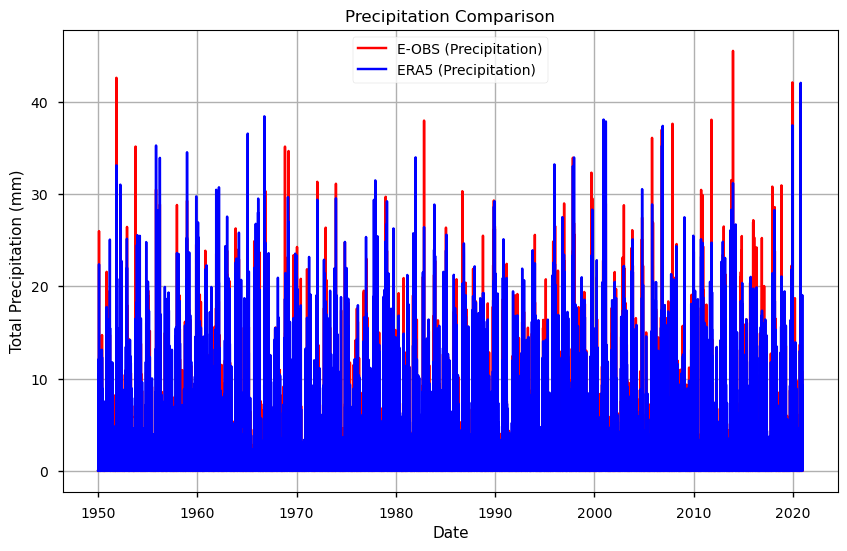

In [251]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.title('Precipitation Comparison')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')

# Plot tg data
plt.plot(mean_p.time, mean_p['PERC EOBS'], label='E-OBS (Precipitation)', color='red')
plt.plot(mean_p.time, mean_p['PERC ERA5']*1000, label='ERA5 (Precipitation)', color='blue') # total precipitation of ERA5 is in meters (*1000 to mm)

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [252]:
# Specify the year you want to subset (e.g., 2000)
year_to_subset = '2000'

# Subset the dataset for the specified year
subset_p = mean_p.sel(time=year_to_subset)

subset_p

<xarray.Dataset>
Dimensions:    (time: 366)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-12-31
Data variables:
    PERC EOBS  (time) float64 dask.array<chunksize=(366,), meta=np.ndarray>
    PERC ERA5  (time) float64 dask.array<chunksize=(366,), meta=np.ndarray>

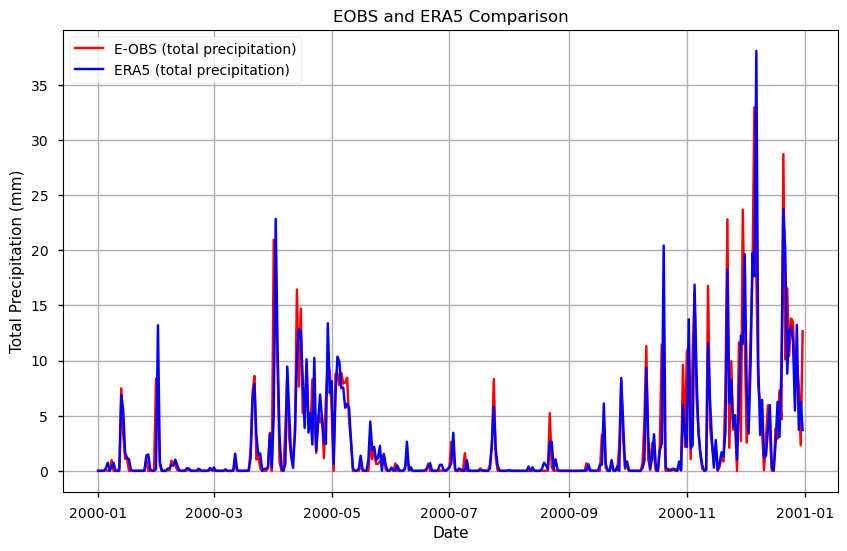

In [253]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.title('EOBS and ERA5 Comparison')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')

# Plot tg data
plt.plot(subset_p.time, subset_p['PERC EOBS'], label='E-OBS (total precipitation)', color='red')
plt.plot(subset_p.time, subset_p['PERC ERA5']*1000, label='ERA5 (total precipitation)', color='blue')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

The graphs show a tendecy of the ERA5 dataset, when compared with E-OBS, smoothing out the more extreme events.

(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ4_v1.1:code-section-3)=
### 3. Calculate Standardized Precipitation Index (SPI)

The Standardized Precipitation Index (SPI) is commonly used to describe meteorological drought across various timescales. It correlates closely with soil moisture on shorter scales and with groundwater and reservoir levels on longer scales. The SPI allows for comparisons between different climatic regions by measuring observed precipitation as a standardized variation from a chosen probability distribution function that best fits the precipitation data. Typically, this data is adjusted to fit either a gamma or a Pearson Type III distribution before being converted into a normal distribution. The SPI values represent the number of standard deviations that the observed precipitation anomaly is from the long-term average. It can be calculated for periods ranging from 1 to 36 months using monthly data. Within the operational community, the SPI is recognized globally as the standard metric for assessing and reporting meteorological drought.

(work in progress)

In [ ]:
import numpy as np
import xarray as xr
from scipy.stats import gamma, norm
import pandas as pd
import matplotlib.pyplot as plt

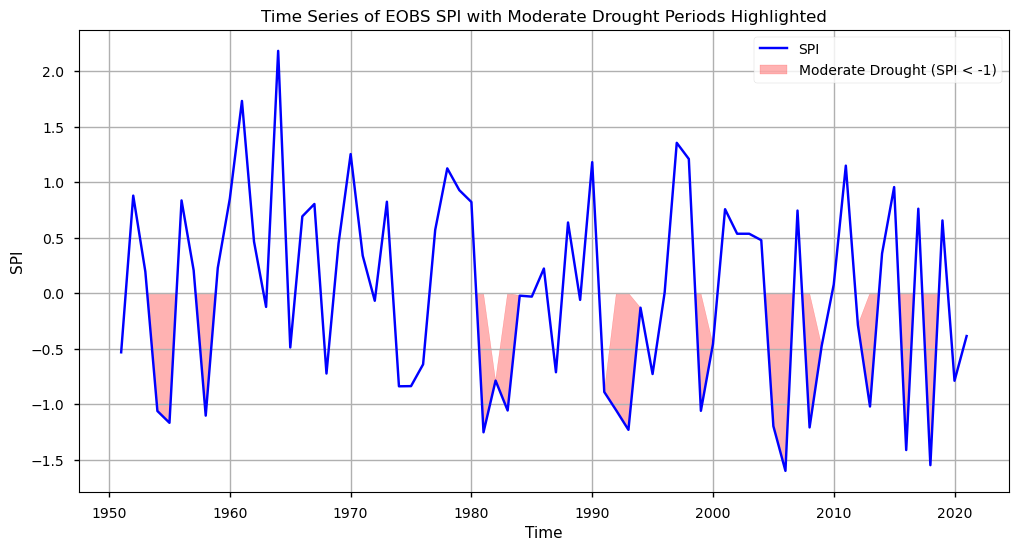

In [259]:
# Define the SPI calculation function
def calc_spi(precip):
    precip = np.array(precip)
    valid_data = precip[precip > 0]
    
    if len(valid_data) < 3:  # Ensure there are enough points to fit the distribution
        return np.full_like(precip, np.nan)
    
    shape, loc, scale = gamma.fit(valid_data, floc=0)
    gamma_dist = gamma(shape, loc=0, scale=scale)
    cdf = gamma_dist.cdf(precip)
    spi = norm.ppf(cdf)
    
    return spi

# Resample the dataset to seasonal totals (3 months), keeping spatial dimensions
annual_precip_EOBS = merged_p['PERC EOBS'].resample(time='1Y').sum()

# Apply the SPI function using apply_ufunc, preserving spatial dimensions
spi_values_EOBS = xr.apply_ufunc(
    calc_spi,
    annual_precip_EOBS,
    input_core_dims=[['time']],
    output_core_dims=[['time']],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[float],
    keep_attrs=True
)

# Compute the results
spi_values_EOBS_compute = spi_values_EOBS.compute()

# Reduce to mean SPI over spatial dimensions
spi_mean_EOBS = spi_values_EOBS_compute.mean(dim=['latitude', 'longitude'])

# Find and print times where SPI indicates moderate drought (SPI < -1)
drought_periods = spi_mean_EOBS.where(spi_mean_EOBS < -1, drop=True)

# Convert the time coordinates to a pandas datetime index for better plotting
spi_mean_EOBS['time'] = pd.to_datetime(spi_mean_EOBS['time'].values)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(spi_mean_EOBS['time'], spi_mean_EOBS, label='SPI', color='b', linestyle='-')

# Highlight the drought periods using fill_between with appropriate mask
plt.fill_between(spi_mean_EOBS['time'], spi_mean_EOBS, where=(spi_mean_EOBS < -1), color='r', alpha=0.3, label='Moderate Drought (SPI < -1)', interpolate=True)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('SPI')
plt.title('Time Series of EOBS SPI with Moderate Drought Periods Highlighted')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

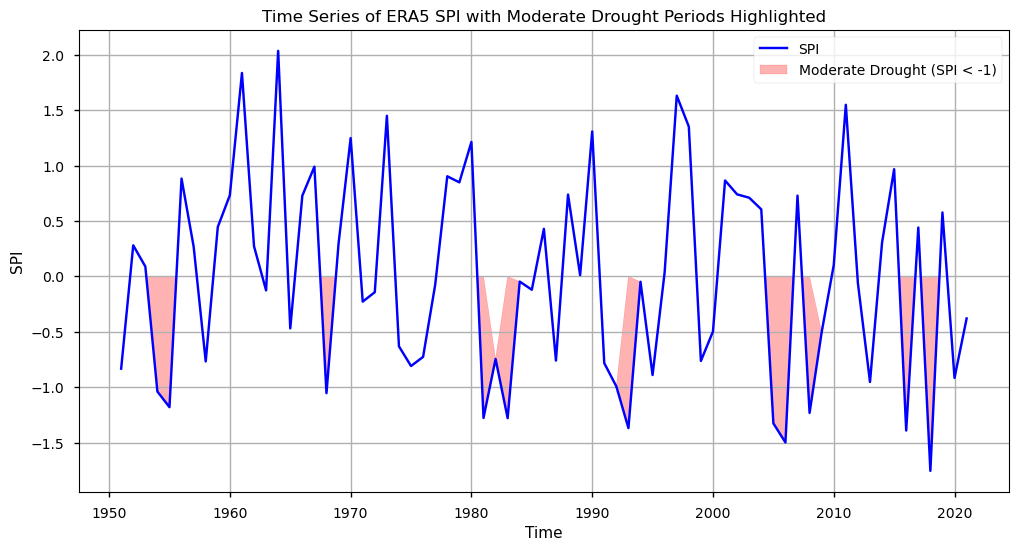

In [261]:
import numpy as np
import xarray as xr
from scipy.stats import gamma, norm
import pandas as pd
import matplotlib.pyplot as plt

# Define the SPI calculation function
def calc_spi(precip):
    precip = np.array(precip)
    valid_data = precip[precip > 0]
    
    if len(valid_data) < 3:  # Ensure there are enough points to fit the distribution
        return np.full_like(precip, np.nan)
    
    shape, loc, scale = gamma.fit(valid_data, floc=0)
    gamma_dist = gamma(shape, loc=0, scale=scale)
    cdf = gamma_dist.cdf(precip)
    spi = norm.ppf(cdf)
    
    return spi

# Resample the dataset to seasonal totals (3 months), keeping spatial dimensions
annual_precip_ERA5 = merged_p['PERC ERA5'].resample(time='1Y').sum()

# Apply the SPI function using apply_ufunc, preserving spatial dimensions
spi_values_ERA5 = xr.apply_ufunc(
    calc_spi,
    annual_precip_ERA5,
    input_core_dims=[['time']],
    output_core_dims=[['time']],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[float],
    keep_attrs=True
)

# Compute the results
spi_values_ERA5_compute = spi_values_ERA5.compute()

# Reduce to mean SPI over spatial dimensions
spi_mean_ERA5 = spi_values_ERA5_compute.mean(dim=['latitude', 'longitude'])

# Find and print times where SPI indicates moderate drought (SPI < -1)
drought_periods = spi_mean_ERA5.where(spi_mean_ERA5 < -1, drop=True)

# Convert the time coordinates to a pandas datetime index for better plotting
spi_mean_ERA5['time'] = pd.to_datetime(spi_mean_ERA5['time'].values)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(spi_mean_ERA5['time'], spi_mean_ERA5, label='SPI', color='b', linestyle='-')

# Highlight the drought periods using fill_between with appropriate mask
plt.fill_between(spi_mean_ERA5['time'], spi_mean_ERA5, where=(spi_mean_ERA5 < -1), color='r', alpha=0.3, label='Moderate Drought (SPI < -1)', interpolate=True)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('SPI')
plt.title('Time Series of ERA5 SPI with Moderate Drought Periods Highlighted')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ4_v1.1:code-section-4)=
### 4. Calculate Consecutive Dry Days (CDD)

Drought is measured by the maximum number of consecutive dry days in each year k, MaxCDD(k), where a dry day is counted when precipitation is less than 1 millimeter. Monthly values are obtained for each month j, year k, by linear interpolation, where MaxCDD(12,k) = MaxCDD(k). For other values of j, MaxCDD(j,k) = (12-j)/12 * MaxCDD(12,k-1) + j/12 * MaxCDD(12,k). Anomalies are measured by the departure in a month’s maximum consecutive dry days from the average across the monthly reference period values from 1950–2020

(work in progress)

In [272]:
import xarray as xr


# Define a dry day (precipitation < 1mm)
dry_day_mask = merged_p['PERC EOBS'] < 1

# Cumulative sum of dry days, resetting when a non-dry day is encountered
def compute_consecutive_dry_days(dry_days):
    # Convert the mask to float to avoid issues during cumulative operations
    dry_days = dry_days.astype(float)
    # Where it's not a dry day, set to NaN to break the cumulative sum
    dry_days = dry_days.where(dry_days == 1)
    # Forward fill the NaNs with zeros (resetting the count after each non-dry day)
    dry_days = dry_days.fillna(0)
    # Cumulative sum of the adjusted series
    return dry_days.cumsum('time')

# Apply the function across the dataset
consecutive_dry_days_EOBS = dry_day_mask.groupby('time.year').map(compute_consecutive_dry_days)
consecutive_dry_days_EOBS

(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ4_v1.1:code-section-5)=
### 5. Trend Analysis
Calculate linear regression, to analyze the trends in SPI and CDD indices over time. This involves calculating the slope of the trend line which indicates whether the drought conditions are worsening or improving.


(work in progress)

In [ ]:
# Time Analysis

In [ ]:
# Spatial Patterns Analysis

--------------------------------------------------------------------------------------------------------------

(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_EOBS_UQ4_v1.1:code-section-6)=
### 6. Main Takeaways

* Geographical Patterns: The analysis is expected to reveal specific NUTS2 regions within Europe that are more prone to frequent and severe drought conditions. This could be visualized through climatology and trend maps, pinpointing areas where drought risk management should be prioritized.

* Increasing or Decreasing Trends: The linear trend analysis of the Standardized Precipitation Index (SPI) and Consecutive Dry Days (CDD) could show whether drought occurrences are becoming more frequent or severe over time. An upward trend in CDD and downward trend in SPI would indicate worsening conditions.

* Temporal Variability: Insights into how drought patterns have evolved over recent decades. The analysis might highlight seasonal variations in drought conditions, which could be crucial for agricultural planning and water resource management. 

## ℹ️ If you want to know more

### Key resources

Some key resources and further reading were linked throughout this assessment.

The CDS catalogue entry for the data used were:
* E-OBS daily gridded meteorological data for Europe from 1950 to present derived from in-situ observations:
    https://cds.climate.copernicus.eu/datasets/insitu-gridded-observations-europe?tab=overview

* ERA5 hourly data on pressure levels from 1940 to present:
    https://cds.climate.copernicus.eu/datasets/reanalysis-era5-pressure-levels?tab=overview 

Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [BOpen](https://www.bopen.eu/)

### References

[[1]](https://library.wmo.int/index.php?lvl=notice_display&id=20130) World Meteorological Organization (WMO) Guidelines on the Calculation of Climate Normals: 

[[2]](https://doi.org/10.1029/2017JD028200) Cornes, R., G. van der Schrier, E.J.M. van den Besselaar, and P.D. Jones. 2018: An Ensemble Version of the E-OBS Temperature and Precipitation Datasets, J. Geophys. Res. (Atmospheres), 123.

[[3]](https://doi.org/10.1002/JOC.7269) Bandhauer, Moritz, Francesco Isotta, Mónika Lakatos, Cristian Lussana, Line Båserud, Beatrix Izsák, Olivér Szentes, Ole Einar Tveito, and Christoph Frei. 2022. “Evaluation of Daily Precipitation Analyses in E-OBS (V19.0e) and ERA5 by Comparison to Regional High-Resolution Datasets in European Regions.” International Journal of Climatology 42 (2): 727–47.

[[4]](https://doi.org/10.1002/gdj3.178) Vicente-Serrano, S. M., Domínguez-Castro, F., Reig, F., Tomas-Burguera, M., Peña-Angulo, D., Latorre, B., Beguería, S., Rabanaque, I., Noguera, I., Lorenzo-Lacruz, J., & Kenawy, A. E. (2023). A global drought monitoring system and dataset based on ERA5 reanalysis: A focus on crop-growing regions. Geoscience Data Journal, 10(4), 505-518. 

[[5]](https://doi.org/10.3390/su152215999) Kourtis, I. M., Vangelis, H., Tigkas, D., Mamara, A., Nalbantis, I., Tsakiris, G., & Tsihrintzis, V. A. Drought Assessment in Greece Using SPI and ERA5 Climate Reanalysis Data. Sustainability, 15(22), 15999. 
